In [455]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("2-CBR.csv")
df.columns
df.head()

,State,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Andhra Pradesh,31.3,36.7,31.2,32.2,30.1,29.8,27.7,28.6,29.4,...,16.7,16.8,17.0,16.7,16.6,16.6,16.7,16.3,16.1,15.8
1,Arunachal Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.3,15.2,14.9,14.6,14.2,13.9,13.8,13.2,15.3,16.1
2,Assam,31.0,27.7,27.6,24.8,23.7,24.0,24.7,23.0,24.0,...,15.5,15.7,15.9,15.8,15.5,15.6,15.4,15.5,15.3,15.0
3,Bihar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.9,22.5,22.2,22.0,21.7,21.6,21.5,19.9,20.6,21.1
4,Chhattisgarh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.6,19.3,19.0,18.6,18.3,18.0,17.9,18.4,18.3,18.1


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


<Figure size 1440x360 with 0 Axes>

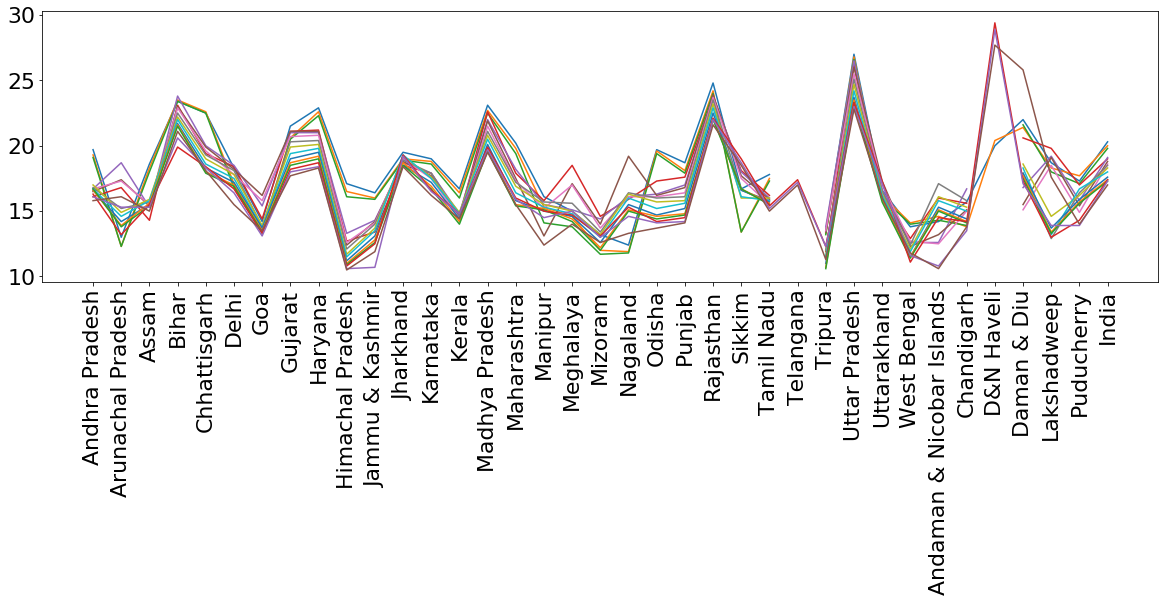

<Figure size 1440x360 with 0 Axes>

In [457]:
df=pd.read_csv("2-CBR.csv")
df1 =df.loc[:1, [' State ','2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016']].copy()
arr=['2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
     '2014', '2015', '2016']
for i in arr:
    plt.plot(df['State'],df[i],label='Square')
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = [20, 5]
plt.figure()

In [458]:
df=pd.read_csv("2-CBR.csv")
df=df.T
new_header1 = df.iloc[0] 
df = df[1:] 
df.columns = new_header1
df=df.iloc[:,:-1]
df.fillna(0, inplace=True)
#df.head()
df2=pd.read_csv("3-CDR.csv")
df2=df2.T
new_header2 = df2.iloc[0] 
df2 = df2[1:] 
df2.columns = new_header2 
df2=df2.iloc[:,:-1]
df2.fillna(0, inplace=True)

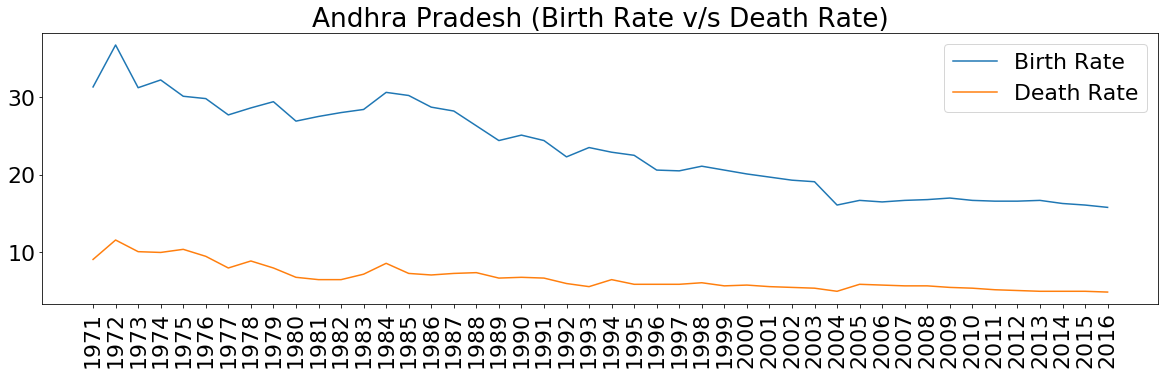

In [459]:
plt.title("Andhra Pradesh (Birth Rate v/s Death Rate)")
plt.xticks(rotation=90)
plt.plot(df['Andhra Pradesh'],label='Birth Rate')
plt.plot(df2["Andhra Pradesh"],label='Death Rate')
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 22})
plt.show()

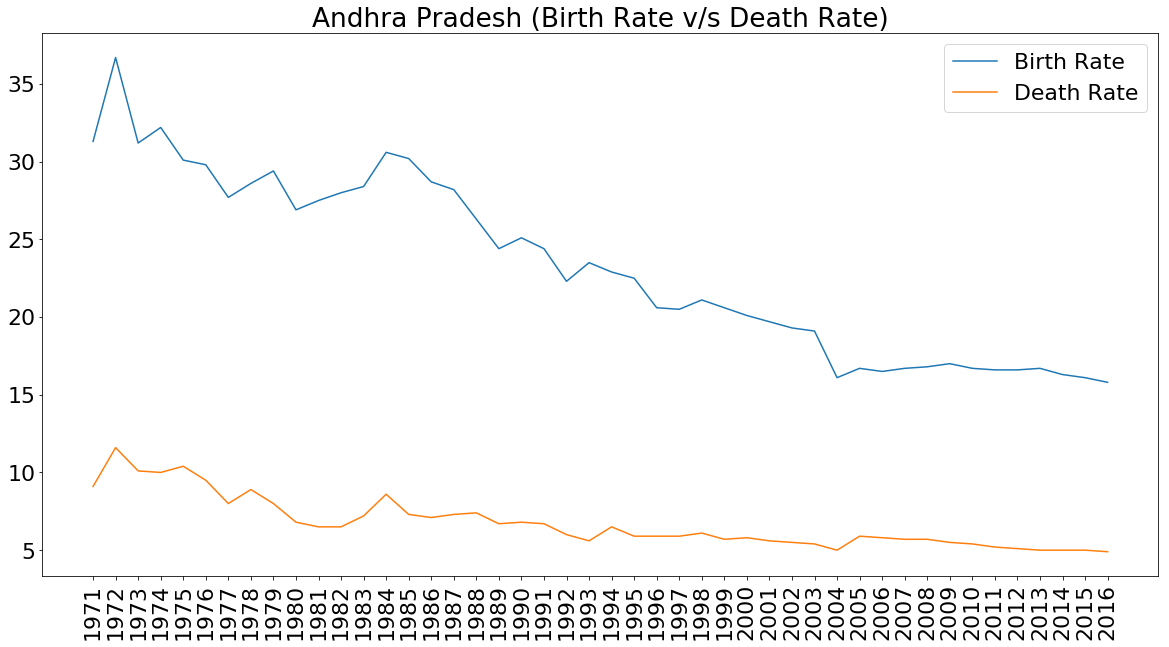

In [460]:
plt.title("Andhra Pradesh (Birth Rate v/s Death Rate)")
plt.xticks(rotation=90)
plt.plot(df['Andhra Pradesh'],label='Birth Rate')
plt.plot(df2["Andhra Pradesh"],label='Death Rate')
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 22})
plt.show()


# Prediction ( Birth Rate )

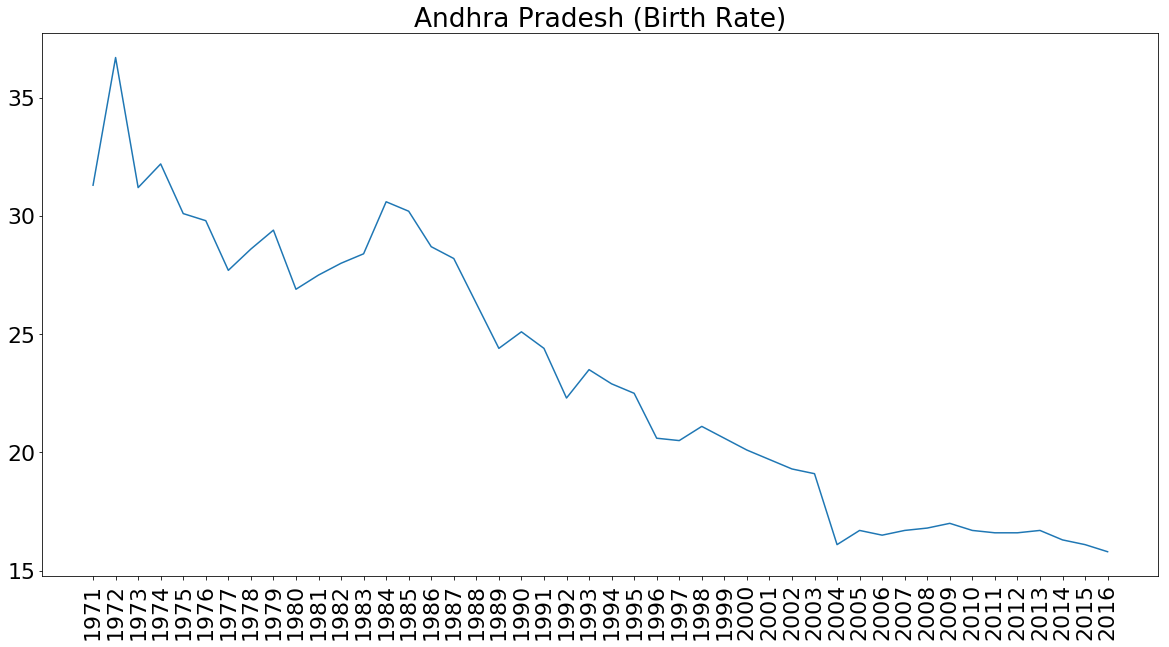

In [461]:
plt.plot(df['Andhra Pradesh'])
plt.xticks(rotation=90)
plt.title("Andhra Pradesh (Birth Rate)")
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

In [462]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics

    rolmean = timeseries.rolling(window=3).mean()
    rolstd=timeseries.rolling(window=3).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xticks(rotation=90)
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    timeseries = timeseries.iloc[:,0].values
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

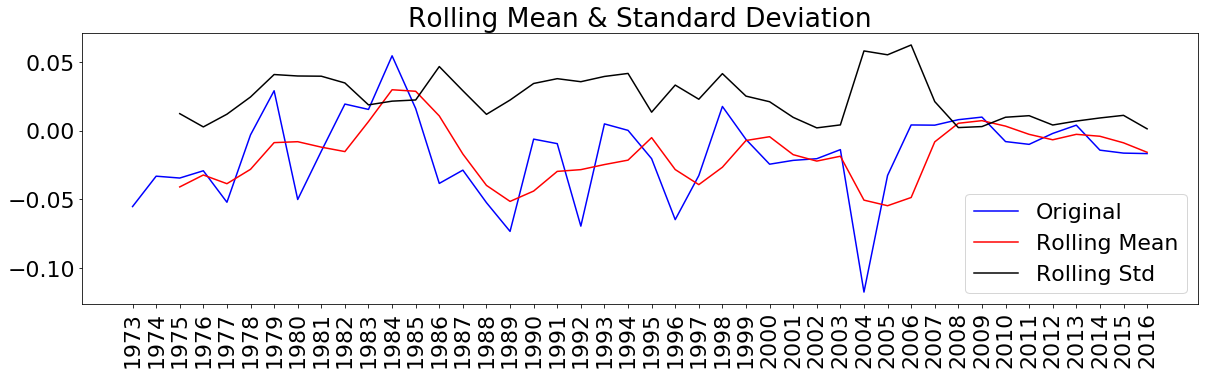

Results of Dickey-Fuller Test:
Test Statistic                 -5.063700
p-value                         0.000017
#Lags Used                      0.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


In [463]:
import numpy as np
ts = df.iloc[:,0]
ts=ts.to_frame()
ts.index.names = ['Date']
plt.xticks(rotation=90)
ts_log = np.log(ts)
moving_avg = ts_log.rolling(window=3).mean()

ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)
plt.rcParams['figure.figsize'] = [20, 5]

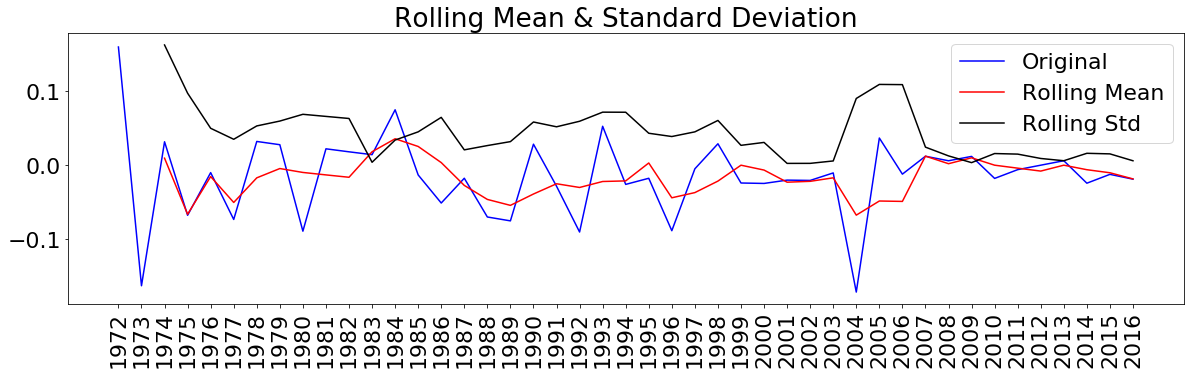

Results of Dickey-Fuller Test:
Test Statistic                -1.089517e+01
p-value                        1.197339e-19
#Lags Used                     0.000000e+00
Number of Observations Used    4.400000e+01
Critical Value (1%)           -3.588573e+00
Critical Value (5%)           -2.929886e+00
Critical Value (10%)          -2.603185e+00
dtype: float64


In [464]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)


# Applying ARIMA Model

In [465]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

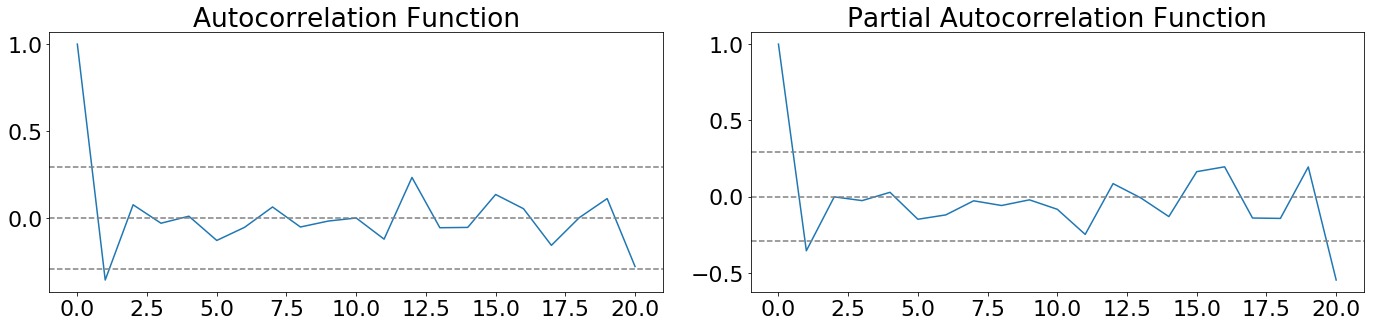

In [466]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.1223')

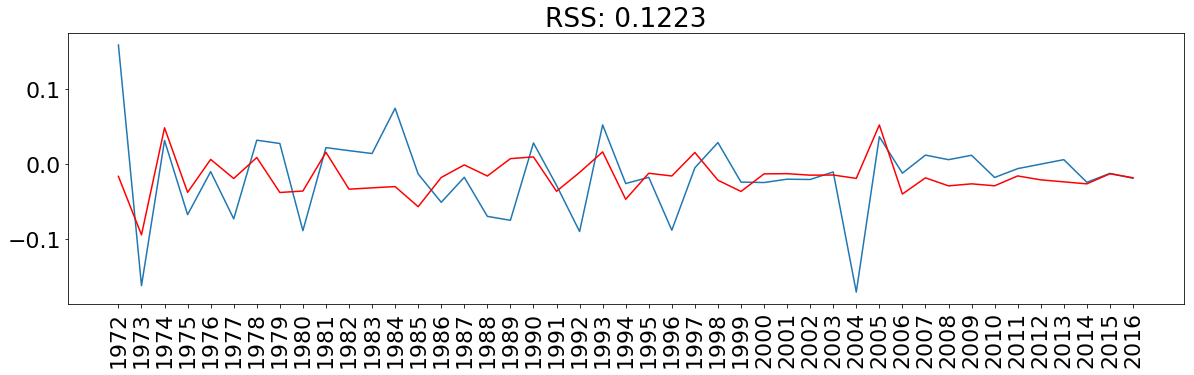

In [467]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.xticks(rotation=90)
A=results_AR.fittedvalues
B=ts_log_diff.squeeze()
plt.title('RSS: %.4f'% sum((A-B)**2))

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.1228')

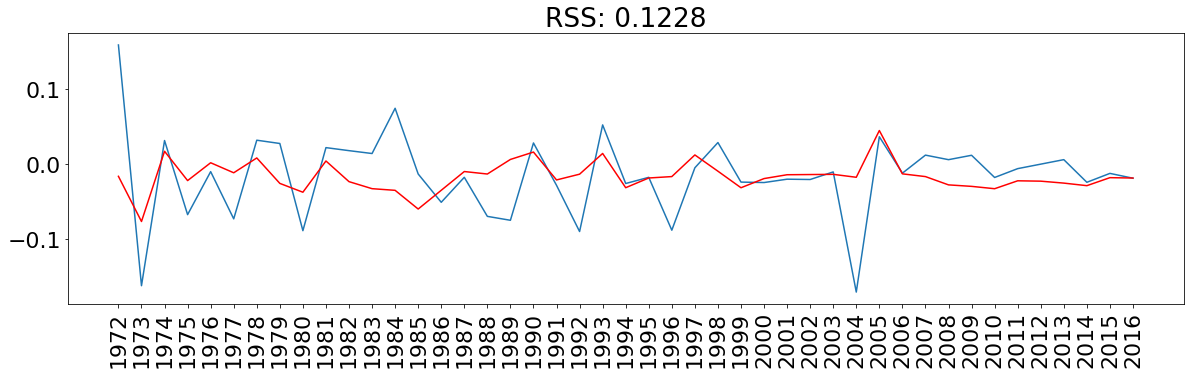

In [468]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.xticks(rotation=90)
A=results_MA.fittedvalues
B=ts_log_diff.squeeze()
plt.title('RSS: %.4f'% sum((A-B)**2))

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.1223')

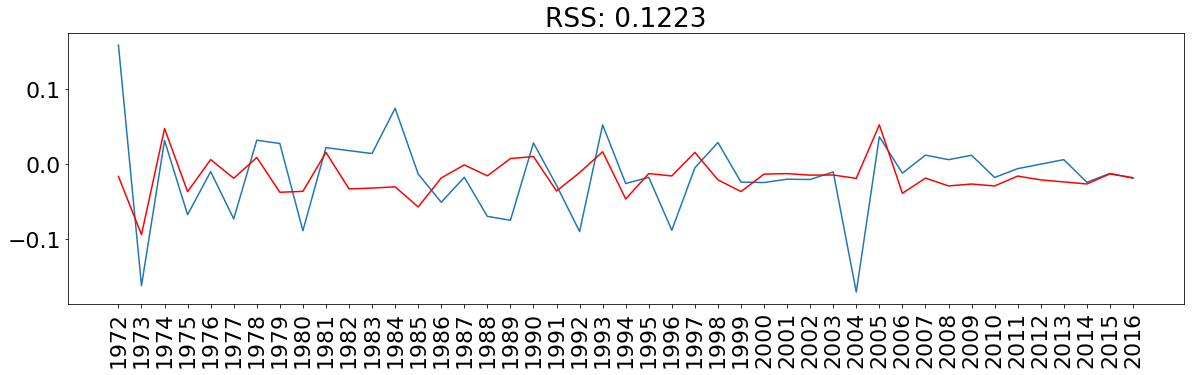

In [469]:
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
A=results_ARIMA.fittedvalues
B=ts_log_diff.squeeze()
plt.xticks(rotation=90)
plt.title('RSS: %.4f'% sum((A-B)**2))

In [470]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Date
1972   -0.016376
1973   -0.094162
1974    0.047545
1975   -0.036758
1976    0.006091
dtype: float64


In [471]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Date
1972   -0.016376
1973   -0.110538
1974   -0.062993
1975   -0.099751
1976   -0.093660
dtype: float64


In [472]:
predictions_ARIMA_log = pd.Series(ts_log.squeeze().iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
1971    3.443618
1972    3.427242
1973    3.333080
1974    3.380625
1975    3.343867
dtype: float64

Text(0.5,1,'RMSE: 2.6499')

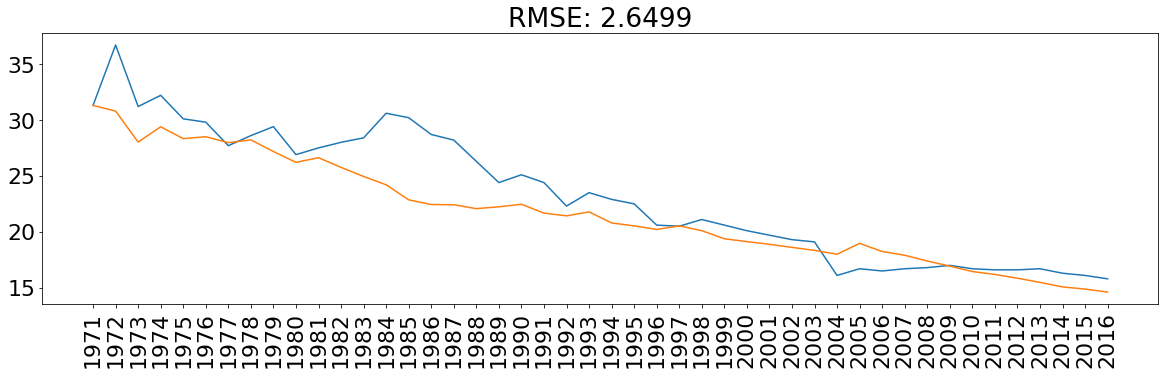

In [473]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts,label='Original')
plt.xticks(rotation=90)
plt.plot(predictions_ARIMA,label='Prediction')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts.squeeze())**2)/len(ts)))


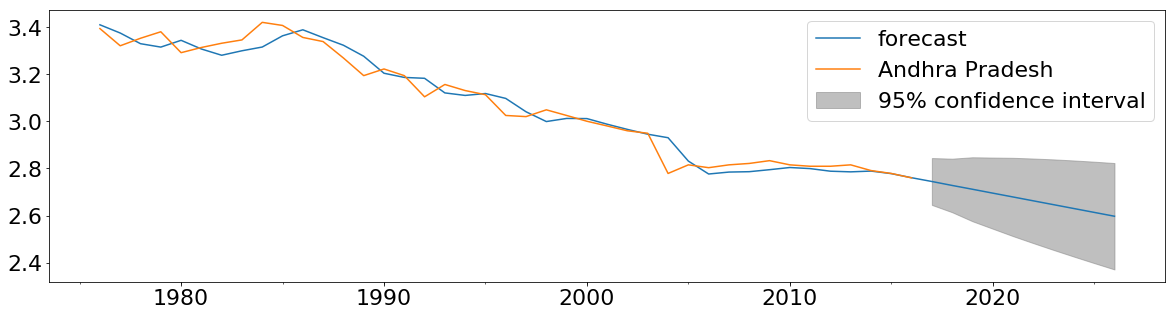

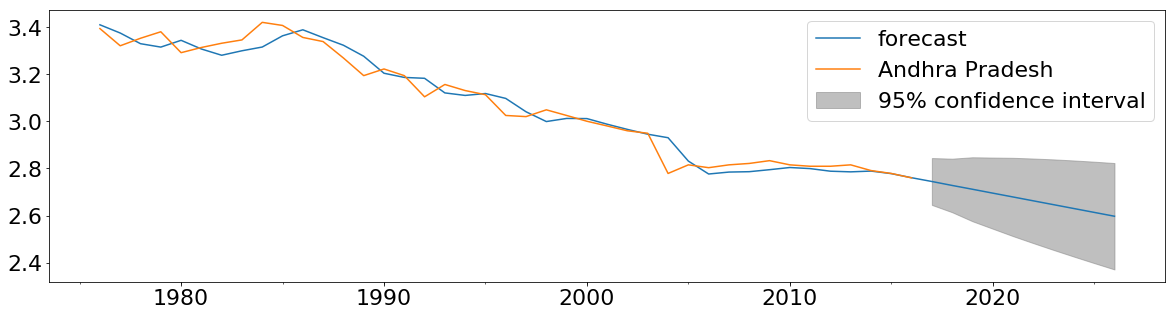

In [474]:
results_ARIMA.plot_predict(5,55)

In [475]:
X=int(input("Enter Year(After 2016)="))-2016
print("Predicted Birth Rate of Andhra Pradesh in",(X+2016),"is",np.exp(results_ARIMA.forecast(steps=X)[0][-1]))
print("Lowest Birth Rate of Andhra Pradesh in",(X+2016),"is",np.exp(results_ARIMA.forecast(steps=X)[2][-1][0]))
print("Highest Birth Rate of Andhra Pradesh in",(X+2016),"is",np.exp(results_ARIMA.forecast(steps=X)[2][-1][1]))

Enter Year(After 2016)=2021
Predicted Birth Rate of Andhra Pradesh in 2021 is 14.568793166223816
Lowest Birth Rate of Andhra Pradesh in 2021 is 12.335373282897272
Highest Birth Rate of Andhra Pradesh in 2021 is 17.20659192490668


# Prediction (Death Rate)

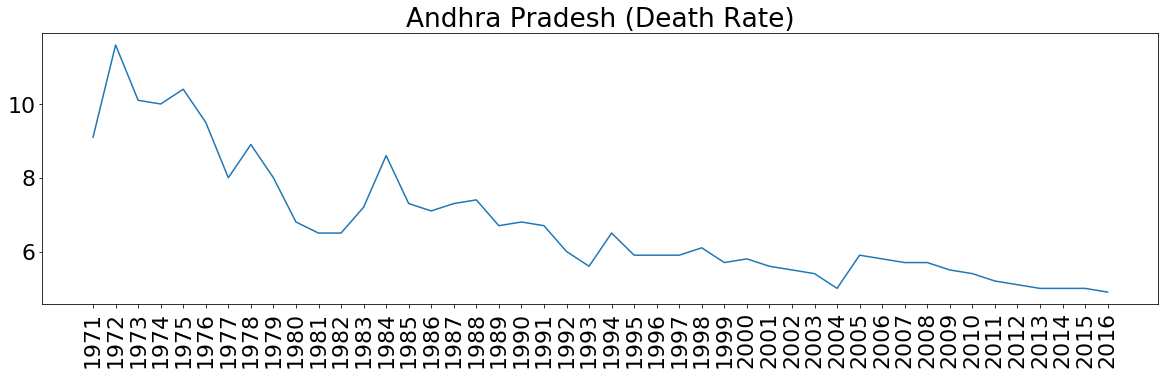

In [476]:
plt.plot(df2['Andhra Pradesh'])
plt.xticks(rotation=90)
plt.title("Andhra Pradesh (Death Rate)")
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

In [477]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics

    rolmean = timeseries.rolling(window=3).mean()
    rolstd=timeseries.rolling(window=3).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xticks(rotation=90)
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    timeseries = timeseries.iloc[:,0].values
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

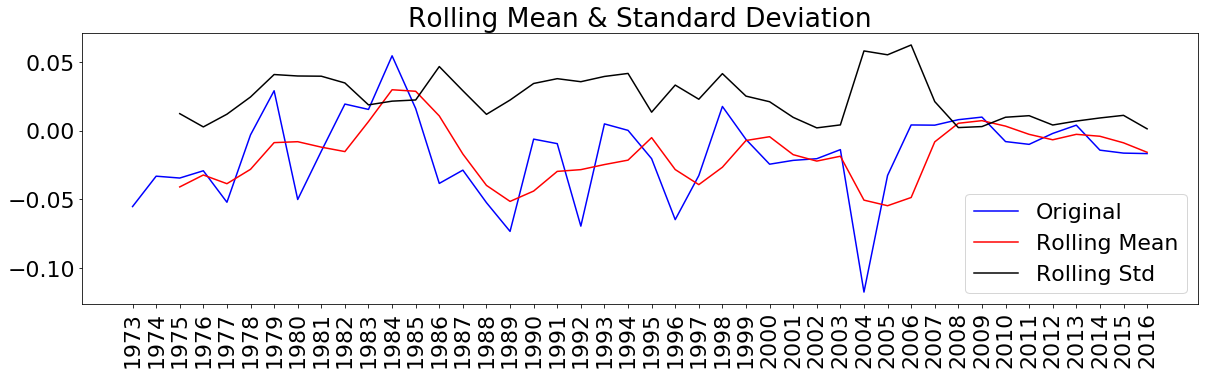

Results of Dickey-Fuller Test:
Test Statistic                 -5.063700
p-value                         0.000017
#Lags Used                      0.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


In [478]:
import numpy as np
ts = df.iloc[:,0]
ts=ts.to_frame()
ts.index.names = ['Date']
plt.xticks(rotation=90)
ts_log = np.log(ts)
moving_avg = ts_log.rolling(window=3).mean()

ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)
plt.rcParams['figure.figsize'] = [20, 5]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


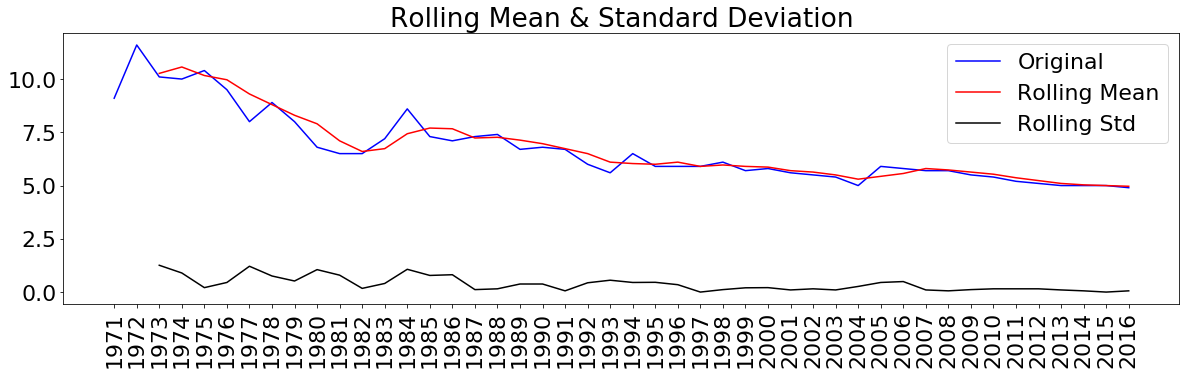

Results of Dickey-Fuller Test:
Test Statistic                 -2.202390
p-value                         0.205379
#Lags Used                     10.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64


In [479]:
import numpy as np
ts2 = df2.iloc[:,0]
ts2=pd.Series(ts2).convert_objects(convert_numeric=True)
ts2=ts2.to_frame()
ts.index.names = ['Date']
test_stationarity(ts2)

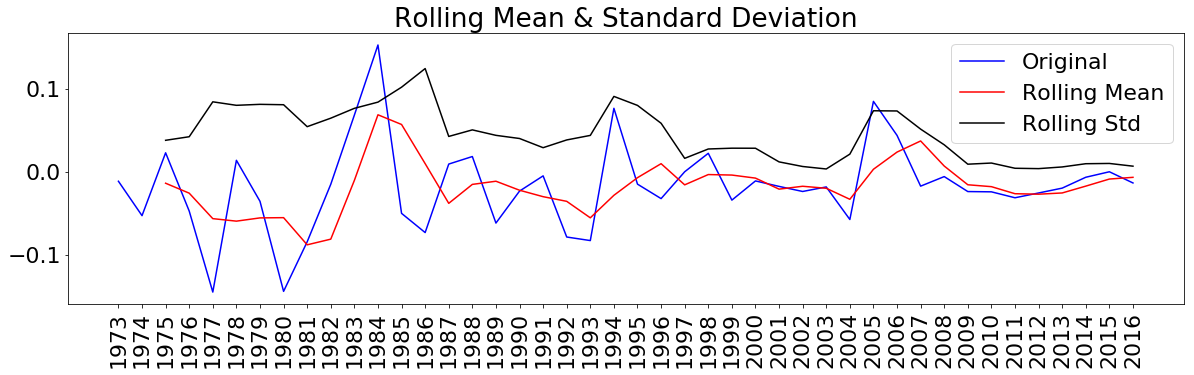

Results of Dickey-Fuller Test:
Test Statistic                -5.842941e+00
p-value                        3.740451e-07
#Lags Used                     1.000000e+00
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64


In [480]:
ts2_log = np.log(ts2)
moving_avg2 = ts2_log.rolling(window=3).mean()

ts2_log_moving_avg_diff = ts2_log - moving_avg2
ts2_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts2_log_moving_avg_diff)
plt.rcParams['figure.figsize'] = [20, 5]

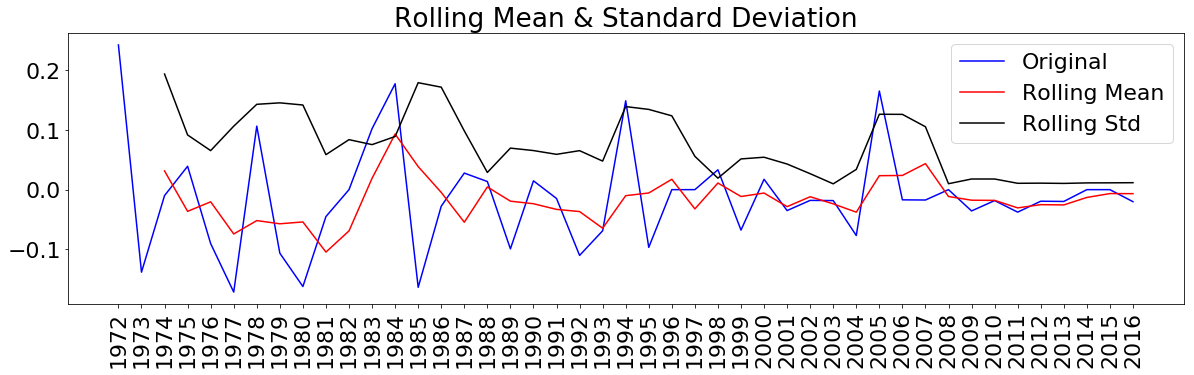

Results of Dickey-Fuller Test:
Test Statistic                 -3.782383
p-value                         0.003093
#Lags Used                      8.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


In [481]:
ts2_log_diff = ts2_log - ts2_log.shift()
ts2_log_diff.dropna(inplace=True)
test_stationarity(ts2_log_diff)

# Applying ARIMA Model


In [482]:
from statsmodels.tsa.stattools import acf, pacf
lag2_acf = acf(ts2_log_diff, nlags=20)
lag2_pacf = pacf(ts2_log_diff, nlags=20, method='ols')

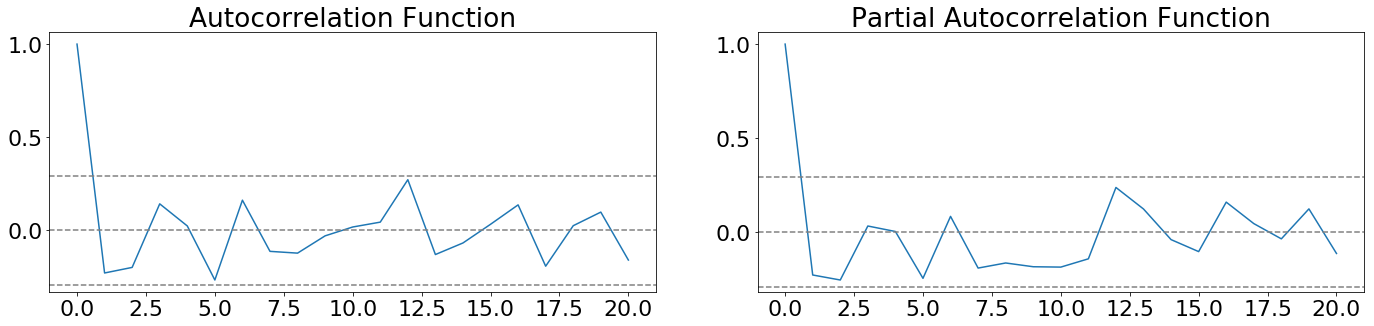

In [483]:
plt.subplot(121) 
plt.plot(lag2_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts2_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts2_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag2_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts2_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts2_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.2979')

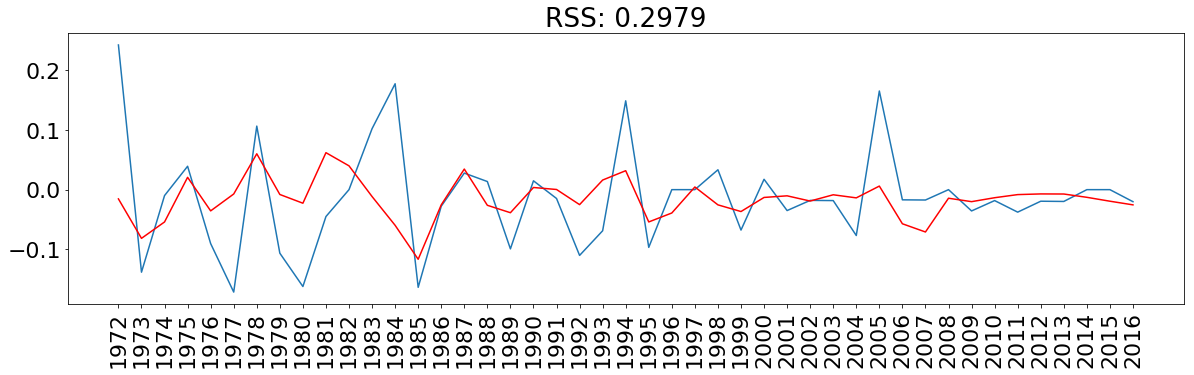

In [484]:
from statsmodels.tsa.arima_model import ARIMA
model2 = ARIMA(ts2_log, order=(2, 1, 0))  
results_AR2 = model2.fit(disp=-1)  
plt.plot(ts2_log_diff)
plt.plot(results_AR2.fittedvalues, color='red')
plt.xticks(rotation=90)
A=results_AR2.fittedvalues
B=ts2_log_diff.squeeze()
plt.title('RSS: %.4f'% sum((A-B)**2))

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.2971')

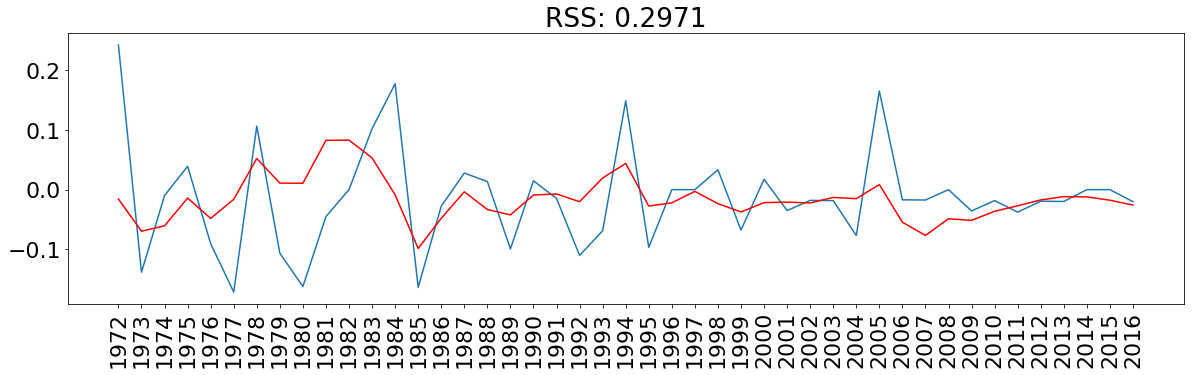

In [485]:
model2 = ARIMA(ts2_log, order=(0, 1, 2))  
results_MA2 = model2.fit(disp=-1)  
plt.plot(ts2_log_diff)
plt.plot(results_MA2.fittedvalues, color='red')
plt.xticks(rotation=90)
A=results_MA2.fittedvalues
B=ts2_log_diff.squeeze()
plt.title('RSS: %.4f'% sum((A-B)**2))

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.2977')

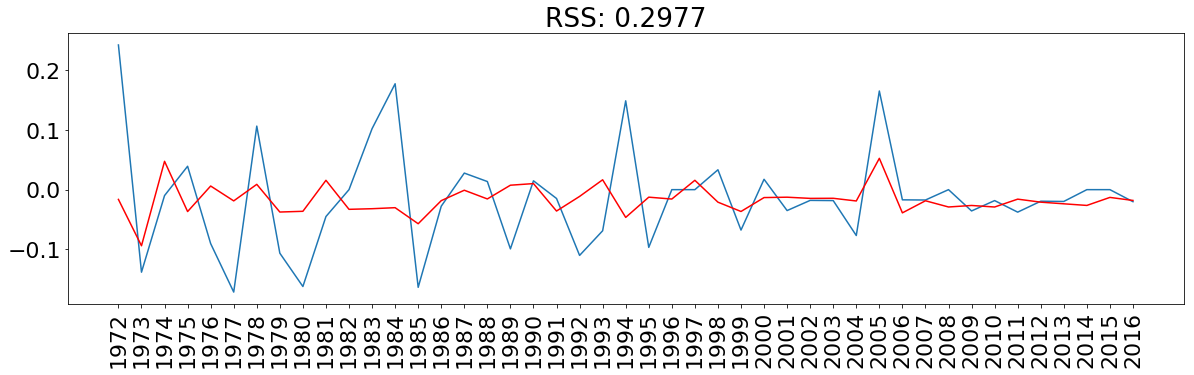

In [486]:
model2 = ARIMA(ts2_log, order=(2, 1, 1))  
results_ARIMA2= model2.fit(disp=-1)  
plt.plot(ts2_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
A=results_ARIMA2.fittedvalues
B=ts2_log_diff.squeeze()
plt.xticks(rotation=90)
plt.title('RSS: %.4f'% sum((A-B)**2))

In [487]:
predictions_ARIMA2_diff = pd.Series(results_ARIMA2.fittedvalues, copy=True)
print (predictions_ARIMA2_diff.head())

1972   -0.015462
1973   -0.081516
1974   -0.054850
1975    0.027126
1976   -0.038926
dtype: float64


In [488]:
predictions_ARIMA2_diff_cumsum = predictions_ARIMA2_diff.cumsum()
print (predictions_ARIMA2_diff_cumsum.head())

1972   -0.015462
1973   -0.096978
1974   -0.151828
1975   -0.124701
1976   -0.163627
dtype: float64


In [489]:
predictions_ARIMA2_log = pd.Series(ts2_log.squeeze().iloc[0], index=ts2_log.index)
predictions_ARIMA2_log = predictions_ARIMA2_log.add(predictions_ARIMA2_diff_cumsum,fill_value=0)
predictions_ARIMA2_log.head()

1971    2.208274
1972    2.192813
1973    2.111297
1974    2.056447
1975    2.083573
dtype: float64

Text(0.5,1,'RMSE: 0.9699')

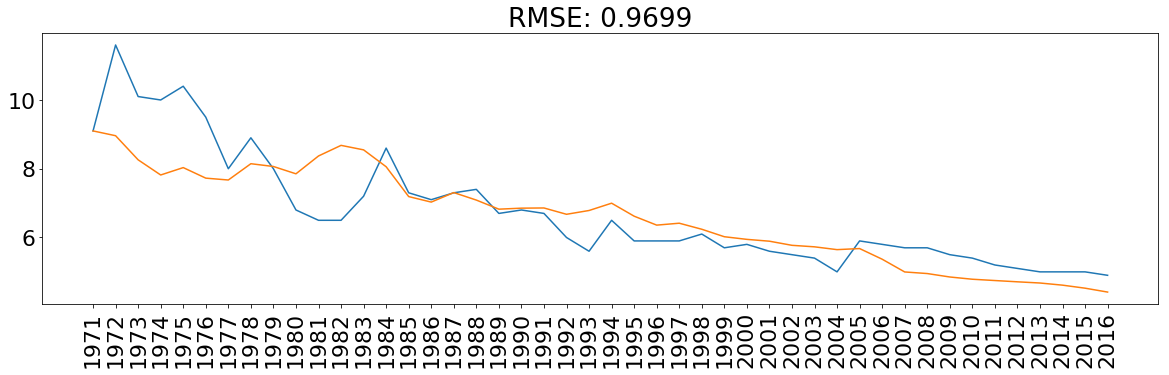

In [490]:
predictions_ARIMA2 = np.exp(predictions_ARIMA2_log)
plt.plot(ts2,label='Original')
plt.xticks(rotation=90)
plt.plot(predictions_ARIMA2,label='Prediction')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA2-ts2.squeeze())**2)/len(ts2)))

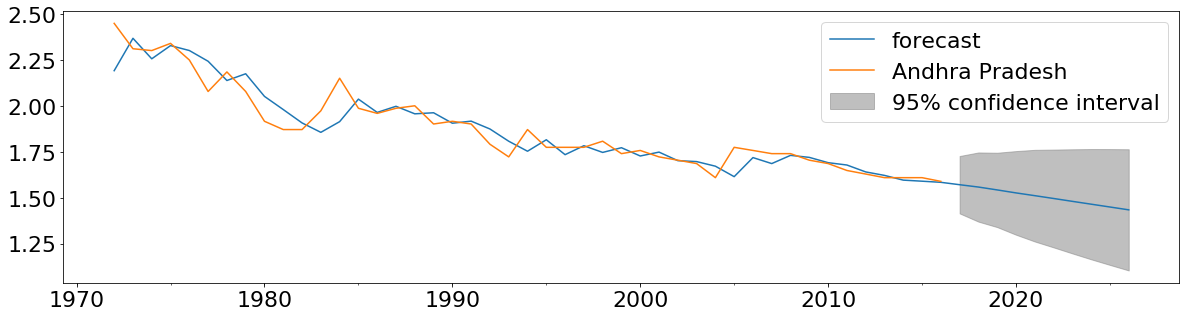

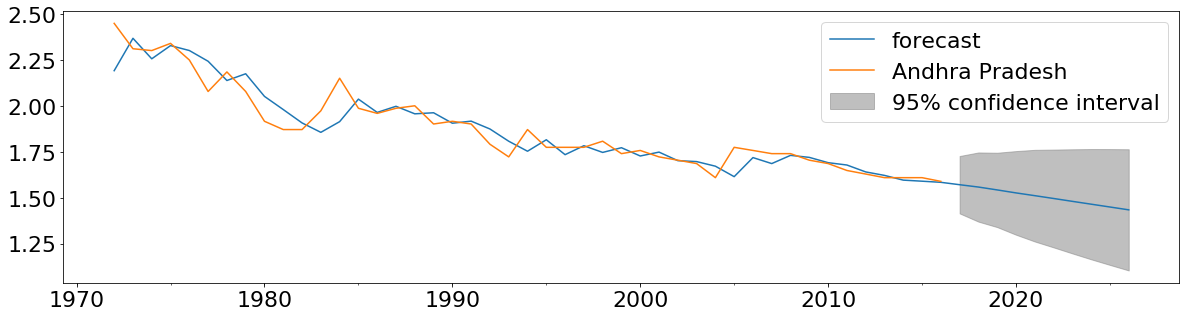

In [491]:
results_ARIMA2.plot_predict(1,55)

In [492]:
X=int(input("Enter Year(After 2016)="))-2016
print("Predicted Death Rate of Andhra Pradesh in",(X+2016),"is",np.exp(results_ARIMA2.forecast(steps=X)[0][-1]))
print("Lowest Death Rate of Andhra Pradesh in",(X+2016),"is",np.exp(results_ARIMA2.forecast(steps=X)[2][-1][0]))
print("Highest Death Rate of Andhra Pradesh in",(X+2016),"is",np.exp(results_ARIMA2.forecast(steps=X)[2][-1][1]))

Enter Year(After 2016)=2021
Predicted Death Rate of Andhra Pradesh in 2021 is 4.532565724168752
Lowest Death Rate of Andhra Pradesh in 2021 is 3.5303153350808008
Highest Death Rate of Andhra Pradesh in 2021 is 5.819353257133103


In [493]:
X=int(input("Enter Year(After 2016)="))-2016
print("Predicted Birth Rate of Andhra Pradesh in",(X+2016),"is",np.exp(results_ARIMA.forecast(steps=X)[0][-1]))
print("Lowest Birth Rate of Andhra Pradesh in",(X+2016),"is",np.exp(results_ARIMA.forecast(steps=X)[2][-1][0]))
print("Highest Birth Rate of Andhra Pradesh in",(X+2016),"is",np.exp(results_ARIMA.forecast(steps=X)[2][-1][1]))
print("Predicted Death Rate of Andhra Pradesh in",(X+2016),"is",np.exp(results_ARIMA2.forecast(steps=X)[0][-1]))
print("Lowest Death Rate of Andhra Pradesh in",(X+2016),"is",np.exp(results_ARIMA2.forecast(steps=X)[2][-1][0]))
print("Highest Death Rate of Andhra Pradesh in",(X+2016),"is",np.exp(results_ARIMA2.forecast(steps=X)[2][-1][1]))

Enter Year(After 2016)=2021
Predicted Birth Rate of Andhra Pradesh in 2021 is 14.568793166223816
Lowest Birth Rate of Andhra Pradesh in 2021 is 12.335373282897272
Highest Birth Rate of Andhra Pradesh in 2021 is 17.20659192490668
Predicted Death Rate of Andhra Pradesh in 2021 is 4.532565724168752
Lowest Death Rate of Andhra Pradesh in 2021 is 3.5303153350808008
Highest Death Rate of Andhra Pradesh in 2021 is 5.819353257133103
